In [ ]:
pip install --upgrade ipython

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Import Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xml.etree.ElementTree as ET

file_path = '/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml'
tree = ET.parse(file_path)
root = tree.getroot()

In [ ]:
# Memeriksa isi data XML
for elem in root:
    print(f"Tag: {elem.tag}, Isi: {elem.text}")
    for subelem in elem:
        print(f"  Sub Tag: {subelem.tag}, Isi: {subelem.text}")

Tag: forecast, Isi: 

  Sub Tag: issue, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 

  Sub Tag: area, Isi: 



In [ ]:
#Memeriksa elemen 'issue'
for issue in root.findall('./forecast/issue'):
    timestamp = issue.find('timestamp').text
    year = issue.find('year').text
    month = issue.find('month').text
    day = issue.find('day').text
    hour = issue.find('hour').text
    minute = issue.find('minute').text
    second = issue.find('second').text

    print(f"Timestamp: {timestamp}")
    print(f"Year: {year}")
    print(f"Month: {month}")
    print(f"Day: {day}")
    print(f"Hour: {hour}")
    print(f"Minute: {minute}")
    print(f"Second: {second}")

Timestamp: 20230908024749
Year: 2023
Month: 09
Day: 08
Hour: 02
Minute: 47
Second: 49


In [ ]:
data = []

for area in root.findall('./forecast/area'):
    area_id = area.get('id')
    latitude = area.get('latitude')
    longitude = area.get('longitude')
    area_name = area.find('name').text

    for parameter in area.findall('parameter'):
        parameter_id = parameter.get('id')
        parameter_description = parameter.get('description')

        for value in parameter.findall('timerange/value'):
            unit = value.get('unit')
            value_text = value.text

            data.append({
                'Area ID': area_id,
                'Latitude': latitude,
                'Longitude': longitude,
                'Area Name': area_name,
                'Parameter ID': parameter_id,
                'Parameter Description': parameter_description,
                'Value Unit': unit,
                'Value': value_text
            })

# Membuat DataFrame dari data yang diekstraksi
df = pd.DataFrame(data)

# Menampilkan DataFrame
print(df)

     Area ID  Latitude  Longitude     Area Name Parameter ID  \
0     501409  4.176594  96.124878    Aceh Barat           hu   
1     501409  4.176594  96.124878    Aceh Barat           hu   
2     501409  4.176594  96.124878    Aceh Barat           hu   
3     501409  4.176594  96.124878    Aceh Barat           hu   
4     501409  4.176594  96.124878    Aceh Barat           hu   
...      ...       ...        ...           ...          ...   
3445  501606    2.6453   98.02611  Subulussalam           ws   
3446  501606    2.6453   98.02611  Subulussalam           ws   
3447  501606    2.6453   98.02611  Subulussalam           ws   
3448  501606    2.6453   98.02611  Subulussalam           ws   
3449  501606    2.6453   98.02611  Subulussalam           ws   

     Parameter Description Value Unit        Value  
0                 Humidity          %           90  
1                 Humidity          %           85  
2                 Humidity          %           95  
3                 H

In [ ]:
pd.concat([df.head(5), df.tail(5)])

,Area ID,Latitude,Longitude,Area Name,Parameter ID,Parameter Description,Value Unit,Value
0,501409,4.176594,96.124878,Aceh Barat,hu,Humidity,%,90
1,501409,4.176594,96.124878,Aceh Barat,hu,Humidity,%,85
2,501409,4.176594,96.124878,Aceh Barat,hu,Humidity,%,95
3,501409,4.176594,96.124878,Aceh Barat,hu,Humidity,%,90
4,501409,4.176594,96.124878,Aceh Barat,hu,Humidity,%,90
3445,501606,2.6453,98.02611,Subulussalam,ws,Wind speed,MS,2.57222222
3446,501606,2.6453,98.02611,Subulussalam,ws,Wind speed,Kt,2
3447,501606,2.6453,98.02611,Subulussalam,ws,Wind speed,MPH,2.3015589
3448,501606,2.6453,98.02611,Subulussalam,ws,Wind speed,KPH,3.704
3449,501606,2.6453,98.02611,Subulussalam,ws,Wind speed,MS,1.028888888


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Area ID                3450 non-null   object
 1   Latitude               3450 non-null   object
 2   Longitude              3450 non-null   object
 3   Area Name              3450 non-null   object
 4   Parameter ID           3450 non-null   object
 5   Parameter Description  3450 non-null   object
 6   Value Unit             3450 non-null   object
 7   Value                  3450 non-null   object
dtypes: object(8)
memory usage: 215.8+ KB


In [ ]:
df.describe()

,Area ID,Latitude,Longitude,Area Name,Parameter ID,Parameter Description,Value Unit,Value
count,3450,3450,3450,3450,3450,3450,3450,3450
unique,23,23,23,23,9,9,11,115
top,501409,4.176594,96.124878,Aceh Barat,ws,Wind speed,%,0
freq,150,150,150,150,1104,1104,414,198


In [ ]:
df = df.dropna()
df.isnull().sum()

Area ID                  0
Latitude                 0
Longitude                0
Area Name                0
Parameter ID             0
Parameter Description    0
Value Unit               0
Value                    0
dtype: int64

###### Data Pre processing

In [ ]:
df['Area ID'] = pd.to_numeric(df['Area ID'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area ID                3450 non-null   int64  
 1   Latitude               3450 non-null   float64
 2   Longitude              3450 non-null   float64
 3   Area Name              3450 non-null   object 
 4   Parameter ID           3450 non-null   object 
 5   Parameter Description  3450 non-null   object 
 6   Value Unit             3450 non-null   object 
 7   Value                  3174 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 215.8+ KB


### EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

**Tabulation**

In [ ]:
df['Area Name'].value_counts()

Aceh Barat         150
Bener Meriah       150
Simeulue           150
Sabang             150
Pidie Jaya         150
Pidie              150
Nagan Raya         150
Lhokseumawe        150
Langsa             150
Gayo Lues          150
Bireun             150
Banda Aceh         150
Aceh Barat Daya    150
Aceh Utara         150
Aceh Timur         150
Aceh Tenggara      150
Aceh Tengah        150
Aceh Tamiang       150
Aceh Singkil       150
Aceh Selatan       150
Aceh Jaya          150
Aceh Besar         150
Subulussalam       150
Name: Area Name, dtype: int64

In [ ]:
df['Parameter Description'].value_counts()

Wind speed         1104
Wind direction      828
Temperature         552
Humidity            276
Weather             276
Max temperature     138
Min temperature     138
Max humidity         69
Min humidity         69
Name: Parameter Description, dtype: int64

**Skewness**

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
*If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
*If the skewness is less than -1 or greater than 1, the data are highly skewed
*Zero value means the distribution is symmetrical
*Negative value means the tail of the distribution is longer towards the left hand side of the curve
*Positive value means the tail of the distribution is longer towards the right hand side of the curve

In [ ]:
df.skew()

Area ID      2.876861
Latitude    -0.645835
Longitude   -0.176447
Value        4.324766
dtype: float64

**Kurtosis**

* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

In [ ]:
df.kurt()

Area ID       6.410651
Latitude     -0.540049
Longitude    -1.193430
Value        18.596810
dtype: float64

**Histogram**

<Axes: ylabel='Frequency'>

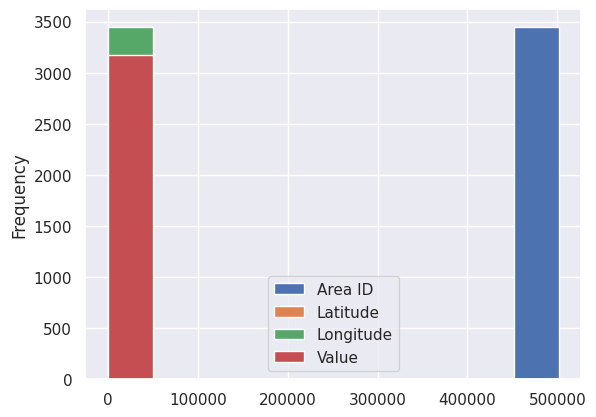

In [ ]:
df.plot.hist()

**Stem & Leaf Plots**

In [ ]:
import sys
!{sys.executable} -m pip install stemgraphic
import stemgraphic

(<Figure size 750x100 with 1 Axes>, <Axes: >)

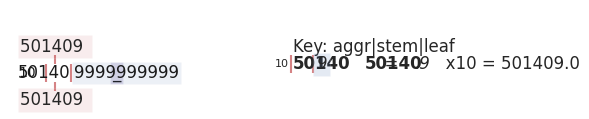

In [ ]:
data = df['Area ID'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

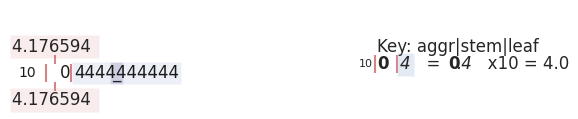

In [ ]:
data = df['Latitude'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

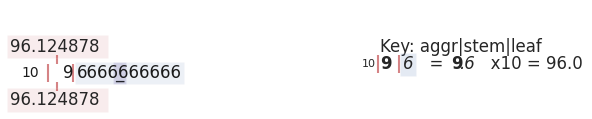

In [ ]:
data = df['Longitude'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x125 with 1 Axes>, <Axes: >)

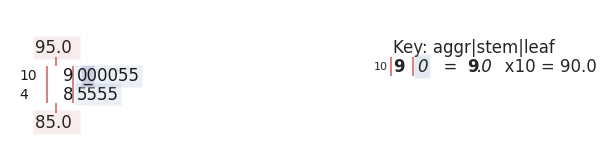

In [ ]:
data = df['Value'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

**Boxplot**

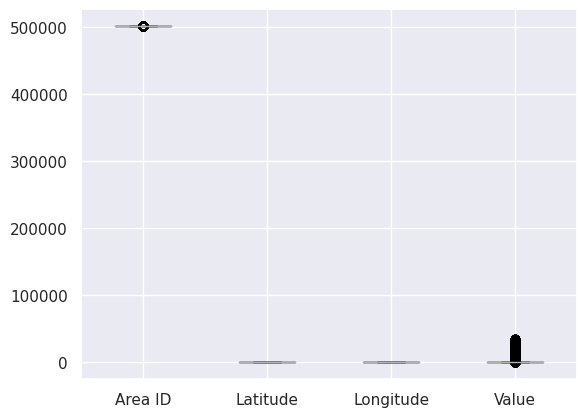

In [ ]:
data = pd.DataFrame(df, columns=['Area ID', 'Latitude', 'Longitude', 'Value'])
boxplot = data.boxplot(column=['Area ID', 'Latitude', 'Longitude', 'Value'])

**Quantile-normal plots**

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

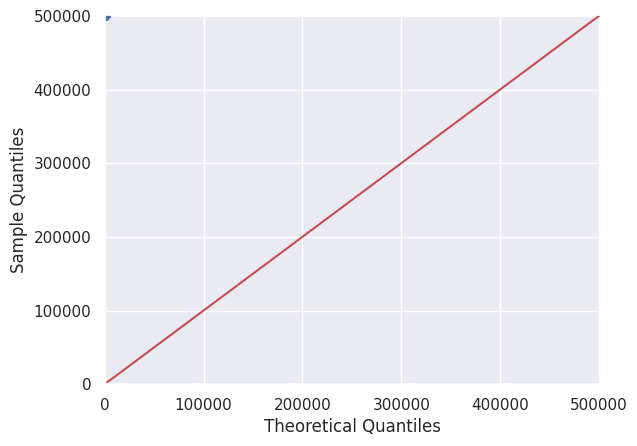

In [ ]:
data_points = df['Area ID']
sm.qqplot(data_points, line ='45')
py.show()

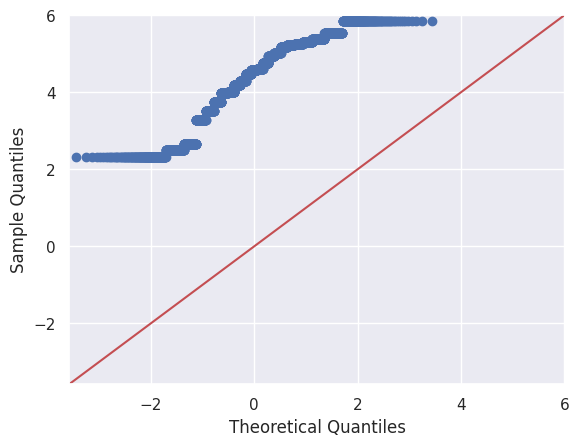

In [ ]:
data_points = df['Latitude']
sm.qqplot(data_points, line ='45')
py.show()

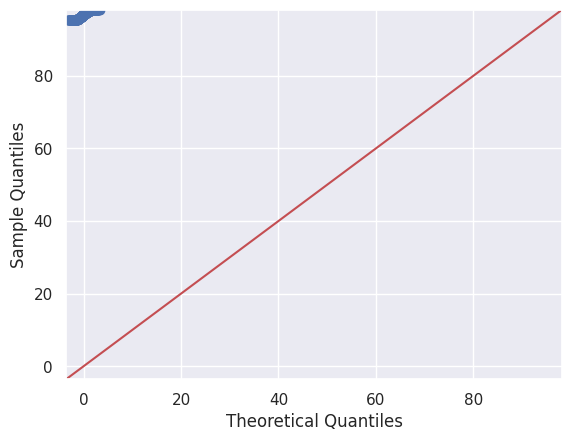

In [ ]:
data_points = df['Longitude']
sm.qqplot(data_points, line ='45')
py.show()

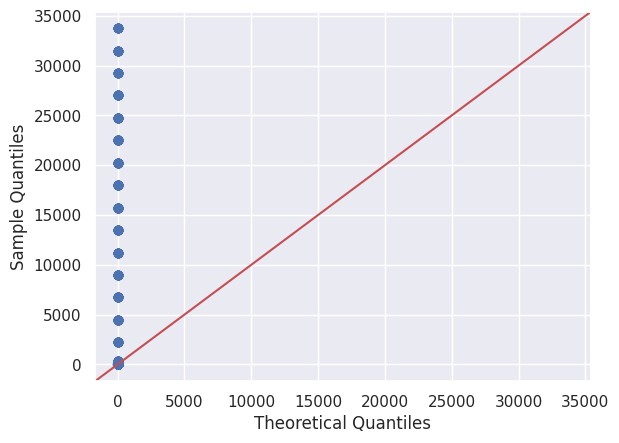

In [ ]:
data_points = df['Value']
sm.qqplot(data_points, line ='45')
py.show()

**Cross Tabulation**

In [ ]:
pd.crosstab(df['Area Name'], df['Parameter Description'], margins=True, normalize=False)

Parameter Description,Humidity,Max humidity,Max temperature,Min humidity,Min temperature,Temperature,Weather,Wind direction,Wind speed,All
Area Name,,,,,,,,,,
Aceh Barat,12,3,6,3,6,24,12,36,48,150
Aceh Barat Daya,12,3,6,3,6,24,12,36,48,150
Aceh Besar,12,3,6,3,6,24,12,36,48,150
Aceh Jaya,12,3,6,3,6,24,12,36,48,150
Aceh Selatan,12,3,6,3,6,24,12,36,48,150
Aceh Singkil,12,3,6,3,6,24,12,36,48,150
Aceh Tamiang,12,3,6,3,6,24,12,36,48,150
Aceh Tengah,12,3,6,3,6,24,12,36,48,150
Aceh Tenggara,12,3,6,3,6,24,12,36,48,150


**Correlation & Covariance**

In [ ]:
df.corr()

,Area ID,Latitude,Longitude,Value
Area ID,1.000000,-0.169007,0.110159,-0.005412
Latitude,-0.169007,1.000000,-0.505222,0.035711
Longitude,0.110159,-0.505222,1.000000,-0.016866
Value,-0.005412,0.035711,-0.016866,1.000000


In [ ]:
correlation = df['Value'].corr(df['Longitude'])
print(f"Korelasi antara 'Value' dan 'Longitude': {correlation}")

correlation = df['Value'].corr(df['Latitude'])
print(f"Korelasi antara 'Value' dan 'Latitude': {correlation}")

correlation = df['Value'].corr(df['Area ID'])
print(f"Korelasi antara 'Value' dan 'Area ID': {correlation}")

correlation = df['Latitude'].corr(df['Longitude'])
print(f"Korelasi antara 'Latitude' dan 'Longitude': {correlation}")

correlation = df['Area ID'].corr(df['Longitude'])
print(f"Korelasi antara 'Area Id' dan 'Longitude': {correlation}")

correlation = df['Area ID'].corr(df['Latitude'])
print(f"Korelasi antara 'Area Id' dan 'Latitude': {correlation}")

Korelasi antara 'Value' dan 'Longitude': -0.01686606229647736
Korelasi antara 'Value' dan 'Latitude': 0.035710503897373916
Korelasi antara 'Value' dan 'Area ID': -0.00541186426639935
Korelasi antara 'Latitude' dan 'Longitude': -0.5052218377646214
Korelasi antara 'Area Id' dan 'Longitude': 0.11015938128589639
Korelasi antara 'Area Id' dan 'Latitude': -0.16900650661052907


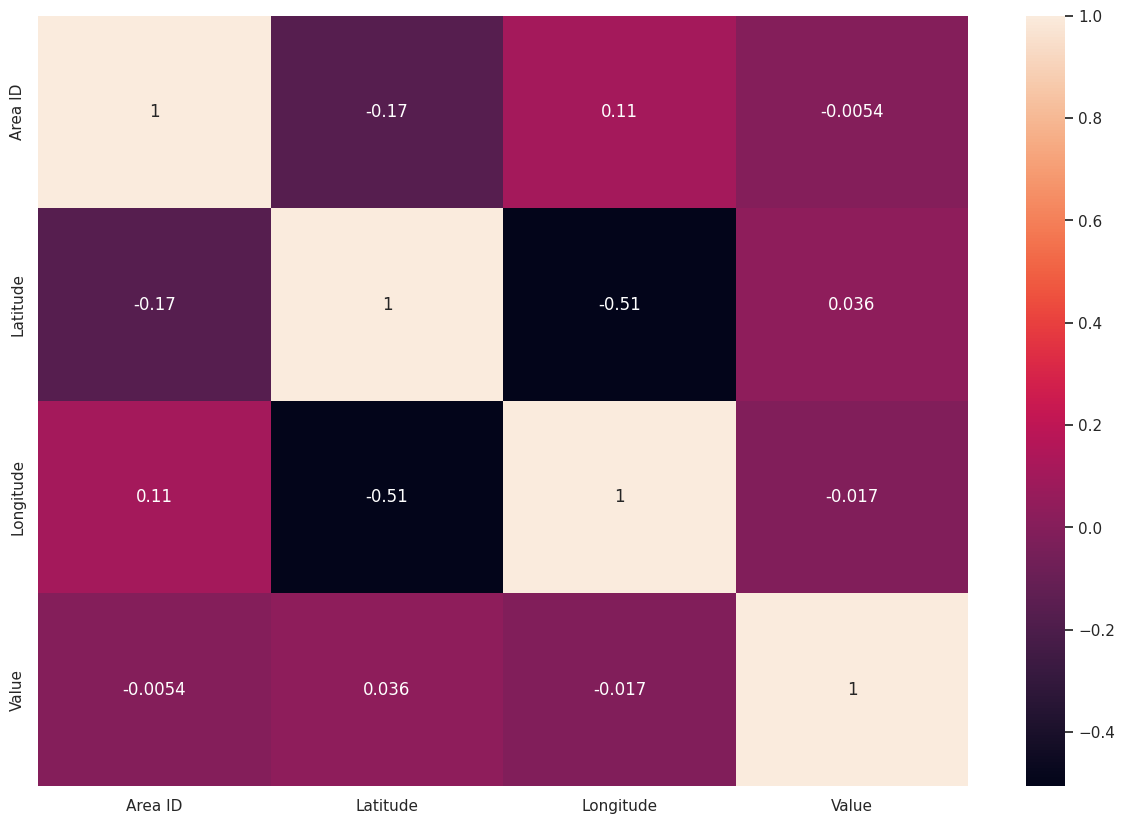

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Scatter Plot**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot

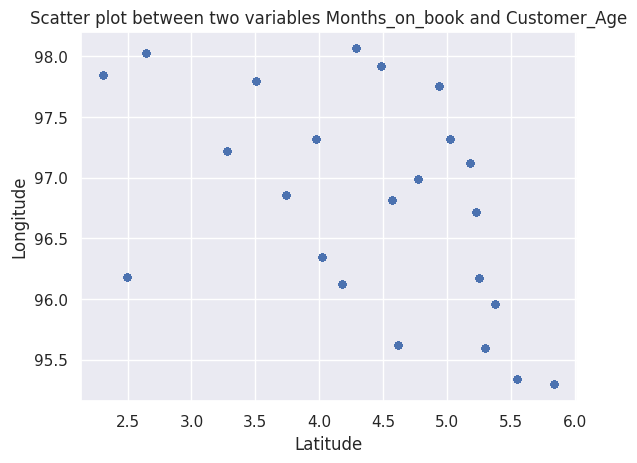

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['Latitude','Longitude']);
dataFrame.plot.scatter(x='Latitude', y='Longitude', title= "Scatter plot between two variables Months_on_book and Customer_Age");
plot.show(block=True);

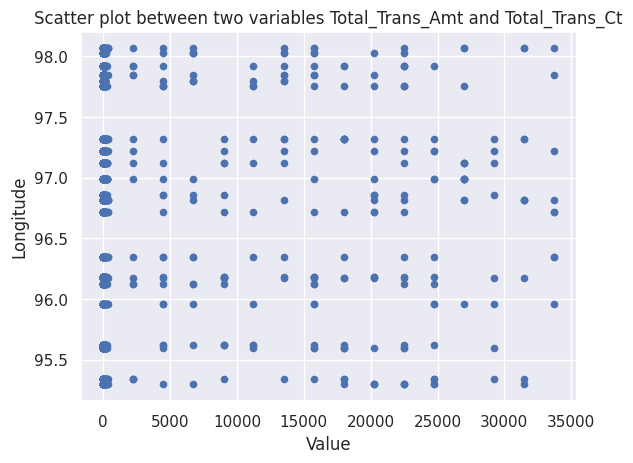

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['Value','Longitude']);
dataFrame.plot.scatter(x='Value', y='Longitude', title= "Scatter plot between two variables Total_Trans_Amt and Total_Trans_Ct");
plot.show(block=True);

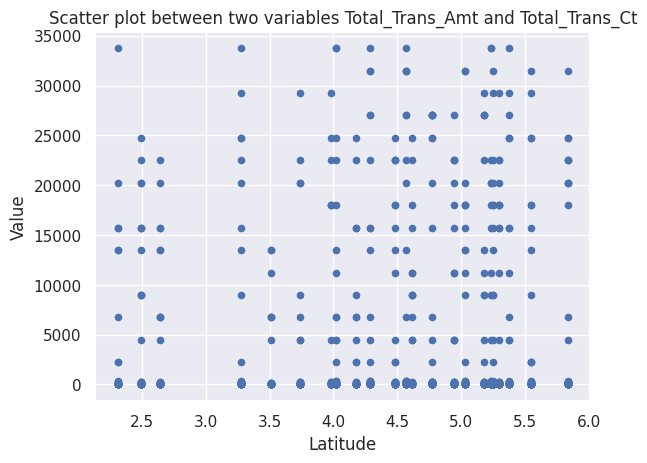

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['Latitude','Value']);
dataFrame.plot.scatter(x='Latitude', y='Value', title= "Scatter plot between two variables Total_Trans_Amt and Total_Trans_Ct");
plot.show(block=True);

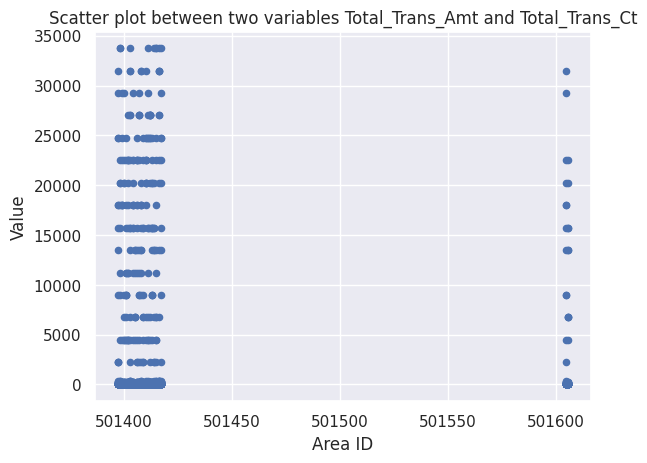

In [ ]:
dataFrame = pd.DataFrame(data=df, columns=['Area ID','Value']);
dataFrame.plot.scatter(x='Area ID', y='Value', title= "Scatter plot between two variables Total_Trans_Amt and Total_Trans_Ct");
plot.show(block=True);

# **R E G R E S S I O N   &   C L U S T E R I N G**

##### Regression

In [ ]:
pip install --upgrade ipython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import datetime


In [ ]:
df.describe()

,Area ID,Latitude,Longitude,Value
count,3450.000000,3450.000000,3450.000000,3174.000000
mean,501424.260870,4.372097,96.801035,1312.572409
std,56.238436,0.978207,0.875484,5044.956382
min,501397.000000,2.310000,95.295350,0.000000
25%,501402.000000,3.740000,96.124878,2.572222
50%,501408.000000,4.566930,96.860000,25.000000
75%,501414.000000,5.230000,97.756348,82.400000
max,501606.000000,5.838860,98.065338,33730.000000


In [ ]:
df = df.dropna(subset=['Value'])

In [ ]:
x=df['Area ID'].values.reshape(-1,1)
y=df['Value'].values.reshape(-1,1)

In [ ]:
future_dates = ()

future_dates = np.array(future_dates).reshape(-1, 1)

**Linear Regression**

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
a = lm.intercept_
a

array([244740.80269474])

In [ ]:
b = lm.coef_
b

array([[-0.48547358]])

Text(0.5, 1.0, 'Area ID vs Value')

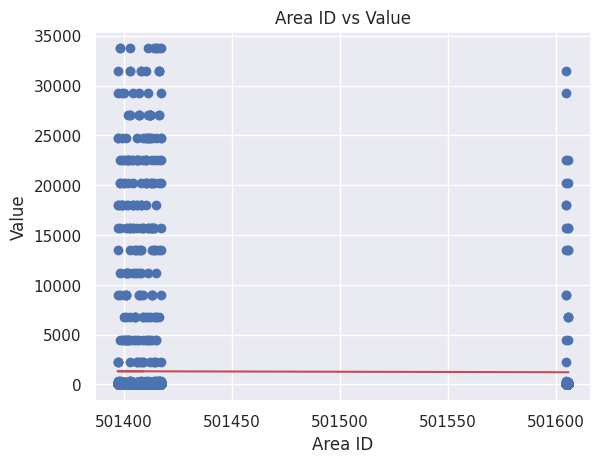

In [ ]:
y_prediksi = model.predict(x)
plt.scatter(x,y)
plt.plot(x, y_prediksi, c='r')
plt.xlabel('Area ID')
plt.ylabel('Value')
plt.title('Area ID vs Value')

In [ ]:
MSE = mean_squared_error(y, y_prediksi)
R2 = r2_score(y, y_prediksi)
MAE = mean_absolute_error(y, y_prediksi)

In [ ]:
MSE

25442820.924960326

In [ ]:
R2

2.9288274837946382e-05

In [ ]:
MAE

2342.7919942386293

###### Prediksi 1 bulan ke depan

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
tanggal_awal = datetime(2023, 9, 8)

In [ ]:
tanggal_akhir = tanggal_awal + timedelta(days=30)

In [ ]:
prediksi_suhu_30_hari = df['Value'].mean()

In [ ]:
print(f"Prediksi suhu 30 hari ke depan: {prediksi_suhu_30_hari:.2f} Celsius")

Prediksi suhu 30 hari ke depan: 1312.57 Celsius


##### Clustering

In [ ]:
pip install --upgrade ipython

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [ ]:
X = df[['Value', 'Area ID', 'Latitude', 'Longitude']] # 'Latitude', 'Longitude', 'Value'

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9541340330727764


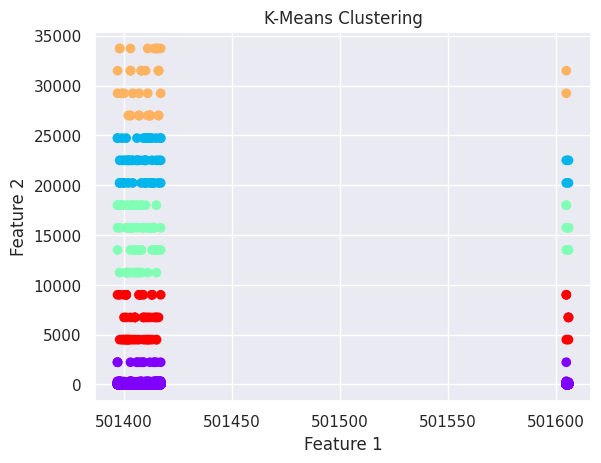

In [ ]:
plt.scatter(df['Area ID'], df['Value'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
true_labels = X['Value']

In [ ]:
homogeneity = homogeneity_score(true_labels, cluster_labels)
completeness = completeness_score(true_labels, cluster_labels)
v_measure = v_measure_score(true_labels, cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target



In [ ]:
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure Score:", v_measure)

Homogeneity Score: 0.0879597964847905
Completeness Score: 0.9999999999999991
V-Measure Score: 0.16169677734230534


**Pengelompokkan dengan beberapa kategori cuaca disetiap kabupaten**

In [ ]:
import pandas as pd

In [ ]:
df['Value_Category'] = pd.cut(df['Value'], bins=3, labels=['Low', 'Medium', 'High'])

<ipython-input-596-1f7c69f6b27b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def categorize_weather(value):
    if value > 80:
        return "Cerah"
    elif 60 <= value <= 80:
        return "Berawan"
    else:
        return "Hujan"

df['Weather_Category'] = df['Value'].apply(categorize_weather)

<ipython-input-597-5970aa0bee9e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_data = df.groupby(['Area ID', 'Weather_Category'])['Value'].count().unstack(fill_value=0)

In [ ]:
print(grouped_data)

Weather_Category  Berawan  Cerah  Hujan
Area ID                                
501397                 19     36     83
501398                 20     35     83
501399                 25     25     88
501400                 20     33     85
501401                 18     42     78
501402                 20     37     81
501403                 22     38     78
501404                 22     33     83
501405                 22     26     90
501406                 20     39     79
501407                 20     37     81
501408                 19     40     79
501409                 17     39     82
501410                 19     40     79
501411                 24     33     81
501412                 23     36     79
501413                 12     48     78
501414                 17     36     85
501415                 22     39     77
501416                 20     33     85
501417                 18     40     80
501605                 20     38     80
501606                 21     38     79


###### **Heatmap**

In [ ]:
!pip install plotly
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import pandas as pd
from geopandas import GeoDataFrame

In [ ]:
geojson_data = pd.read_json('/content/drive/My Drive/UAS Data Mining/output.json')

In [ ]:
print(geojson_data.columns)
print(df.columns)

print(df.head())
print(geojson_data.head())

Index(['data'], dtype='object')
Index(['Area ID', 'Latitude', 'Longitude', 'Area Name', 'Parameter ID',
       'Parameter Description', 'Value Unit', 'Value', 'Value_Category',
       'Weather_Category'],
      dtype='object')
   Area ID  Latitude  Longitude   Area Name Parameter ID  \
0   501409  4.176594  96.124878  Aceh Barat           hu   
1   501409  4.176594  96.124878  Aceh Barat           hu   
2   501409  4.176594  96.124878  Aceh Barat           hu   
3   501409  4.176594  96.124878  Aceh Barat           hu   
4   501409  4.176594  96.124878  Aceh Barat           hu   

  Parameter Description Value Unit  Value Value_Category Weather_Category  
0              Humidity          %   90.0            Low            Cerah  
1              Humidity          %   85.0            Low            Cerah  
2              Humidity          %   95.0            Low            Cerah  
3              Humidity          %   90.0            Low            Cerah  
4              Humidity         

In [ ]:
data = pd.DataFrame({
    'Area ID': ['df'],
    'Latitude': ['df'],
    'Longitude': ['df'],
    'Value': ['df'],
    'Value_Category': ['df'],
    'Weather_Category': ['df']
})

In [ ]:
fig = px.density_mapbox(
    data,
    lat='Latitude',
    lon='Longitude',
    z='Value',
    radius=10,  # Ubah nilai ini sesuai dengan preferensi Anda
    center=dict(lat=4.176594, lon=96.124878),  # Koordinat tengah peta
    zoom=10,  # Tingkat zoom awal
    mapbox_style="carto-positron",  # Ganti dengan gaya peta yang Anda sukai
    title="Heatmap Provinsi Aceh 'Latitude' vs 'Longitude'",
)

In [ ]:
fig.show()

###### Peta Heatmap 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
file_path = '/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml'

In [ ]:
!pip install folium
import random

In [ ]:
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[4.695135, 96.7493993], zoom_start=12)

In [ ]:
# Batas-batas lintang dan bujur Provinsi Aceh yang lebih sesuai secara horizontal
min_latitude = 2.31  # Batas lintang terendah Aceh
max_latitude = 4.616666668  # Batas lintang Aceh
min_longitude = 96.72  # Batas bujur terendah Aceh
max_longitude = 98.065338  # Batas bujur tertinggi Aceh


# Generate data koordinat dan intensitas secara acak yang sesuai dengan Aceh
data = []

for _ in range(500):  # Ganti dengan jumlah titik data yang Anda inginkan
    latitude = random.uniform(min_latitude, max_latitude)
    longitude = random.uniform(min_longitude, max_longitude)
    intensity = random.uniform(0, 1)
    data.append([latitude, longitude, intensity])

# Membuat peta dengan data heatmap
m = folium.Map(location=[4.695135, 96.7493993], zoom_start=11)  # Menyesuaikan level zoom sesuai preferensi
HeatMap(data).add_to(m)

# Menampilkan peta
m

# **C L A S S I F I C A T I O N**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.drop(['Area ID', 'Latitude', 'Longitude', 'Parameter Description', 'Parameter ID', 'Area Name', 'Value Unit', 'Value_Category', 'Weather_Category'] , axis=1)  # Features
y = df['Value']

In [ ]:
data = df.dropna(subset=['Value'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **By Chategories**

**SVC**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model SVM
model = SVC()
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.03614457831325301
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.05      0.22      0.08        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**KNN**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model KNN
model = KNeighborsClassifier(n_neighbors=3)  # Misalnya, menggunakan 3 tetangga terdekat
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.04819277108433735
Report:
              precision    recall  f1-score   support

           0       0.08      0.30      0.12        27
           1       0.04      0.13      0.07        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.16      0.12      0.14        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

**Logistic Regression**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.06927710843373494
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.07      1.00      0.13        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Naive Bayes

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.07530120481927711
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.08      0.96      0.14        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

**Decision Tree**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"
# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.06927710843373494
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.07      1.00      0.13        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Random Forest**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.06927710843373494
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.07      1.00      0.13        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**MLP**

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas requests beautifulsoup4 scikit-learn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# URL sumber data XML di Google Drive
url = "/content/drive/My Drive/UAS Data Mining/data.bmkg.go.id_DataMKG_MEWS_DigitalForecast_DigitalForecast-Aceh.xml"

# Mengambil data dari URL
with open(url, 'r') as file:
    data_xml = file.read()

# Mengonversi data XML ke dalam objek BeautifulSoup
soup = BeautifulSoup(data_xml, "xml")

# Mengonversi data XML ke dalam dataframe Pandas
data = []
for timerange in soup.find_all("timerange"):
    data.append({
        "datetime": timerange["datetime"],
        "weather": timerange.find("value").text
    })

df = pd.DataFrame(data)

# Mempersiapkan data untuk klasifikasi
# Misalnya, menggolongkan cuaca menjadi beberapa kategori (Cerah, Hujan, Berawan, dll.)
# dan kemudian membuat kolom target
le = LabelEncoder()
df["weather_category"] = le.fit_transform(df["weather"])

# Pemisahan data pelatihan dan pengujian
X = df[["datetime"]]
y = df["weather_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model MLP
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
model.fit(X_train, y_train)

# Memprediksi cuaca
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Report:\n{report}")

# Jika perlu, visualisasikan hasil klasifikasi cuaca
# Misalnya, plot data waktu vs. kategori cuaca
# atau gunakan metode visualisasi yang sesuai dengan data Anda.

Akurasi: 0.060240963855421686
Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Hasil Semua Model**

In [ ]:
from sklearn.svm import SVC

# Buat dan latih model SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Buat dan latih model K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=3)  # Anda dapat mengganti nilai n_neighbors sesuai kebutuhan
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Buat dan latih model Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Buat dan latih model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Buat dan latih model Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.neural_network import MLPClassifier

# Buat model MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Atur parameter sesuai kebutuhan

# Latih model MLP dengan data pelatihan
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi dari beberapa algoritma
y_pred_rf = model_rf.predict(X_test)  # Prediksi dari Random Forest
y_pred_svm = model_svm.predict(X_test)  # Prediksi dari SVM
y_pred_knn = model_knn.predict(X_test)  # Prediksi dari K-Nearest Neighbors
y_pred_lr = model_lr.predict(X_test)  # Prediksi dari Logistic Regression
y_pred_nb = model_nb.predict(X_test)  # Prediksi dari Naive Bayes
y_pred_dt = model_dt.predict(X_test)  # Prediksi dari Decision Tree
y_pred_mlp = model_mlp.predict(X_test)  # Prediksi dari MLP

# Label aktual
y_true = y_test

# Menghitung confusion matrix dan akurasi untuk setiap algoritma
confusion_rf = confusion_matrix(y_true, y_pred_rf)
confusion_svm = confusion_matrix(y_true, y_pred_svm)
confusion_knn = confusion_matrix(y_true, y_pred_knn)
confusion_lr = confusion_matrix(y_true, y_pred_lr)
confusion_nb = confusion_matrix(y_true, y_pred_nb)
confusion_dt = confusion_matrix(y_true, y_pred_dt)
confusion_mlp = confusion_matrix(y_true, y_pred_mlp)

accuracy_rf = accuracy_score(y_true, y_pred_rf)
accuracy_svm = accuracy_score(y_true, y_pred_svm)
accuracy_knn = accuracy_score(y_true, y_pred_knn)
accuracy_lr = accuracy_score(y_true, y_pred_lr)
accuracy_nb = accuracy_score(y_true, y_pred_nb)
accuracy_dt = accuracy_score(y_true, y_pred_dt)
accuracy_mlp = accuracy_score(y_true, y_pred_mlp)

# Menampilkan hasil evaluasi
print("Random Forest:")
print("Confusion Matrix:\n", confusion_rf)
print("Akurasi:", accuracy_rf)
print("")

print("SVM:")
print("Confusion Matrix:\n", confusion_svm)
print("Akurasi:", accuracy_svm)
print("")

print("K-Nearest Neighbors:")
print("Confusion Matrix:\n", confusion_knn)
print("Akurasi:", accuracy_knn)
print("")

print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_lr)
print("Akurasi:", accuracy_lr)
print("")

print("Naive Bayes:")
print("Confusion Matrix:\n", confusion_nb)
print("Akurasi:", accuracy_nb)
print("")

print("Decision Tree:")
print("Confusion Matrix:\n", confusion_dt)
print("Akurasi:", accuracy_dt)
print("")

print("MLP:")
print("Confusion Matrix:\n", confusion_mlp)
print("Akurasi:", accuracy_mlp)

Random Forest:
Confusion Matrix:
 [[ 0 27  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 ...
 [ 0  8  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]]
Akurasi: 0.06927710843373494

SVM:
Confusion Matrix:
 [[ 0 11  0 ...  9  6  0]
 [ 0  5  0 ...  3 14  0]
 [ 0  0  0 ...  0  3  0]
 ...
 [ 0  5  0 ...  0  2  0]
 [ 0  6  0 ...  7  7  0]
 [ 0  1  0 ...  3  7  0]]
Akurasi: 0.03614457831325301

K-Nearest Neighbors:
Confusion Matrix:
 [[ 8  6  0 ...  0  0  0]
 [13  3  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 2  4  0 ...  0  0  0]
 [ 8  4  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]]
Akurasi: 0.04819277108433735

Logistic Regression:
Confusion Matrix:
 [[ 0 27  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 ...
 [ 0  8  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]]
Akurasi: 0.06927710843373494

Naive Bayes:
Confusion Matrix:
 [[ 0 24  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 ...
 [ 0  